In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.7MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data_f = data2.loc[data2.team1.isin(['Rajasthan Royals','Sunrisers Hyderabad'])] 
data_f = data_f.loc[data_f.team2.isin(['Rajasthan Royals','Sunrisers Hyderabad'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
415,416,2013,Jaipur,2013-04-27,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,8,JP Faulkner,Sawai Mansingh Stadium,VA Kulkarni,K Srinath,NaN
448,449,2013,Hyderabad,2013-05-17,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,23,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,AK Chaudhary,NaN
454,455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
486,487,2014,Ahmedabad,2014-05-08,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Sunrisers Hyderabad,32,0,B Kumar,"Sardar Patel Stadium, Motera",AK Chaudhary,NJ Llong,NaN
528,529,2015,Visakhapatnam,2015-04-16,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,AM Rahane,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,PG Pathak,S Ravi,NaN
557,558,2015,Mumbai,2015-05-07,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Sunrisers Hyderabad,7,0,EJG Morgan,Brabourne Stadium,JD Cloete,C Shamshuddin,NaN
639,7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
663,7921,2018,Jaipur,29/04/18,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,11,0,KS Williamson,Sawai Mansingh Stadium,Bruce Oxenford,A Nanda Kishore,S Ravi
703,11144,2019,Hyderabad,29/03/19,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,bat,normal,0,Sunrisers Hyderabad,0,5,Rashid Khan,Rajiv Gandhi Intl. Cricket Stadium,Bruce Oxenford,C Shamshuddin,KN Anantapadmanabhan


Finally , We have got a complete dataset for all the matches of RR VS SRH

**Let's do Q1 now**

SRH Wins - 6
RR Wins - 5


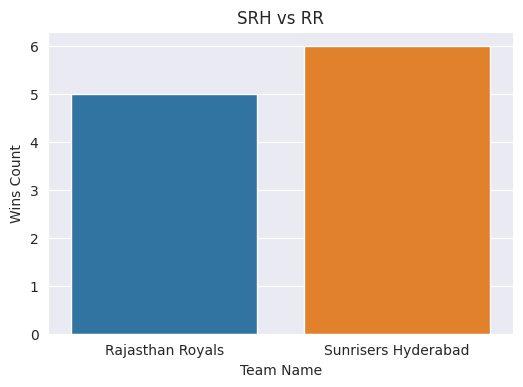

In [11]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('SRH vs RR')
A,B =data_f.winner.value_counts()

print('SRH Wins -',A)
print('RR Wins -',B)

plt.show()


Well It's a neck to neck fight.

Let's find there stats in any UAE stadium

In [13]:
data_f = data_f.loc[data_f.city.isin(['Dubai','Abu Dhabi','Sharjah'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN


Let's mark RR considering there performance in Abu Dhabi.

**Let's do Q2 now**

**Average Wickets lost by RCB in 5-20 overs**

In [14]:
data_n = data.loc[data.bowling_team.isin(['Sunrisers Hyderabad'])]
data_n = data_n.loc[data.batting_team.isin(['Rajasthan Royals'])]

data_n.bowler.value_counts()

B Kumar            173
DW Steyn           125
KV Sharma          119
A Mishra           109
I Sharma           104
S Kaul             101
Rashid Khan         96
Shakib Al Hasan     68
NLTC Perera         60
DJG Sammy           57
P Kumar             50
RS Bopara           42
MC Henriques        31
TA Boult            26
B Stanlake          25
K Ahmed             24
S Sharma            24
Sandeep Sharma      24
S Nadeem            18
YK Pathan           12
Basil Thampi        12
IK Pathan           11
V Shankar            6
A Ashish Reddy       6
Name: bowler, dtype: int64

In [16]:
data_n = data_n.loc[data.bowler.isin(['Rashid Khan'])]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
151233,7897,1,Rajasthan Royals,Sunrisers Hyderabad,8,1,BA Stokes,SV Samson,Rashid Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
151234,7897,1,Rajasthan Royals,Sunrisers Hyderabad,8,2,BA Stokes,SV Samson,Rashid Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
151235,7897,1,Rajasthan Royals,Sunrisers Hyderabad,8,3,BA Stokes,SV Samson,Rashid Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
151236,7897,1,Rajasthan Royals,Sunrisers Hyderabad,8,4,BA Stokes,SV Samson,Rashid Khan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
151237,7897,1,Rajasthan Royals,Sunrisers Hyderabad,8,5,SV Samson,BA Stokes,Rashid Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175628,11336,2,Rajasthan Royals,Sunrisers Hyderabad,14,2,SV Samson,SPD Smith,Rashid Khan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
175629,11336,2,Rajasthan Royals,Sunrisers Hyderabad,14,3,SPD Smith,SV Samson,Rashid Khan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
175630,11336,2,Rajasthan Royals,Sunrisers Hyderabad,14,4,SV Samson,SPD Smith,Rashid Khan,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
175631,11336,2,Rajasthan Royals,Sunrisers Hyderabad,14,5,SV Samson,SPD Smith,Rashid Khan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [93]:
data_n.match_id.nunique()

4

In [21]:
data_n.player_dismissed.value_counts()

JC Buttler       3
L Livingstone    1
Name: player_dismissed, dtype: int64

In [55]:
data_rk2= data_n.groupby(['match_id','over','ball']).apply(lambda data_n:(data_n.player_dismissed.value_counts())).reset_index(name='No of Dismissal')
data_rk2

,match_id,over,ball,level_3,No of Dismissal
0,7897,18,2,JC Buttler,1
1,7921,14,6,JC Buttler,1
2,11144,4,2,JC Buttler,1
3,11336,10,1,L Livingstone,1


In [56]:
data_rk2= data_n.groupby(['match_id','over','ball']).apply(lambda data_n:(data_n.dismissal_kind.value_counts())).reset_index(name='No of Dismissal')
data_rk2

,match_id,over,ball,level_3,No of Dismissal
0,7897,18,2,bowled,1
1,7921,14,6,caught,1
2,11144,4,2,bowled,1
3,11336,10,1,caught,1


As per above Dataframe , he has taken wicket in every game.

Also, he took JC Buttler 3 times so it's highly likely he can get him out today as well

As we can observe except 1 match he got wicket in his 3 or 4 over.
Therefore marked 9-16 balls

**For Q3, Let's find Warner's dismissal v RR**

In [62]:
data_m = data.loc[data.bowling_team.isin(['Rajasthan Royals'])]
data_m = data_m.loc[data.batting_team.isin(['Sunrisers Hyderabad'])]
data_m = data_m.loc[data.batsman.isin(['DA Warner'])]

In [63]:
data_m.dismissal_kind.value_counts()

caught     4
stumped    1
Name: dismissal_kind, dtype: int64

Let's mark caught considering our analysis

**Let's do Q4**

**Let's find Top scoring batsman of SRH v RR**

In [85]:
data_s = data.loc[data.bowling_team.isin(['Sunrisers Hyderabad'])]
data_s = data_s.loc[data.batting_team.isin(['Rajasthan Royals'])]

In [75]:
data_t = data_s.groupby('batsman').apply(lambda data_s:np.sum(data_s['batsman_runs'])).reset_index(name='Overall Runs')
data_t = data_t.sort_values(by='Overall Runs',ascending=False)
data_t.head()

,batsman,Overall Runs
2,AM Rahane,351
30,SV Samson,331
28,SR Watson,159
27,SPD Smith,125
29,STR Binny,98


Let's compare the average of Samson and Smith as they are in present team right now

In [77]:
data_ss = data_s.loc[data.batsman.isin(['SV Samson'])]

In [78]:
data_ss.batsman_runs.sum()

331

In [79]:
data_ss.match_id.nunique()

10

In [80]:
np.round(331/10,2) # average of Samson

33.1

In [86]:
data_spd = data_s.loc[data.batsman.isin(['SPD Smith'])]

In [87]:
data_spd.batsman_runs.sum()

125

In [88]:
data_spd.match_id.nunique()

4

In [89]:
np.round(125/4,2) # average of Smith

31.25

Let's mark Samson considering our analysis

**Let's do Q5 now**

**Let's find average no balls**

In [90]:
data_nb = data.loc[data.bowling_team.isin(['Sunrisers Hyderabad','Rajasthan Royals'])]
data_nb = data_nb.loc[data.batting_team.isin(['Rajasthan Royals','Sunrisers Hyderabad'])]

In [91]:
data_nb.noball_runs.sum()

3

In [92]:
data_nb.match_id.nunique()

11

Let's mark 0-1 considering our analysis

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

